In [1]:
#必要なパッケージのインポート

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import reservoirpy as rpy

from scipy.integrate import solve_ivp
import pandas as pd
from reservoirpy.observables import nrmse, rsquare


rpy.verbosity(0)

from reservoirpy.nodes import Reservoir, Ridge
from reservoirpy.datasets import mackey_glass

# just a little tweak to center the plots, nothing to worry about
from IPython.core.display import HTML
HTML("""
<style>
.img-center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    }
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    }
</style>
""")

rpy.set_seed(42)

%time

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.15 µs


In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# パラメータ
n = 4
vm = 0.505
vd = 1.4
ks = 0.5
k1 = 0.5
k2 = 0.6
Km = 0.5
Kd = 0.13
KI = 1
vs_min = 1.6

# vs_max の値とそれに対応する A の計算
vs_max_values = [1.6, 2.25, 3.1, 4.2]
A_values = [(vs_max / vs_min) - 1 for vs_max in vs_max_values]

# vs を時間 t に対する関数として計算する関数
def vs_function(t, A):
    return vs_min * (1 + A * np.sin(t))

# 微分方程式
def model(t, y, A):
    M, FC, FN = y
    vs = vs_function(t, A)  # vs の値を時間 t に応じて計算
    dMdt = vs * (KI**n / (KI**n + FN**n)) - vm * (M / (Km + M))
    dFCdt = ks * M - vd * (FC / (Kd + FC)) - k1 * FC + k2 * FN
    dFNdt = k1 * FC - k2 * FN
    return [dMdt, dFCdt, dFNdt]

# 初期値と時間設定
y0 = [0.5, 0.5, 0.5]
t_span = [0, 2510]
t_eval = np.linspace(t_span[0], t_span[1], 25100)

# 最初の vs_max の値についてのみシミュレーションとプロット
i = 3
A = A_values[i]
sol = solve_ivp(model, t_span, y0, t_eval=t_eval, args=(A,), max_step=0.01)

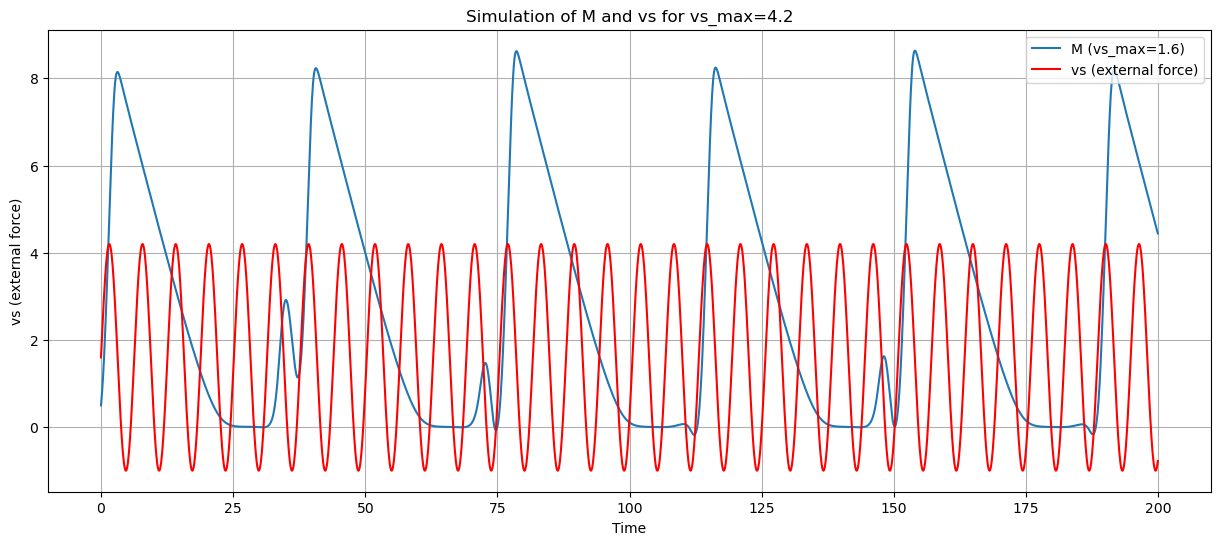

In [3]:
sample = 2000

# M のグラフをプロット
plt.figure(figsize=(15, 6))  # 図のサイズを調整
plt.plot(sol.t[:sample], sol.y[0][:sample], label=f'M (vs_max={vs_max_values[0]})')
plt.title(f'Simulation of M and vs for vs_max={vs_max_values[i]}')
plt.xlabel('Time')
plt.ylabel('Concentration of M')
plt.legend()
plt.grid(True)
vs_values = vs_function(sol.t, A)
plt.plot(sol.t[:sample], vs_values[:sample], 'r', label='vs (external force)')
plt.ylabel('vs (external force)')
plt.legend(loc='upper right')
plt.show()